# Comparison of Machine Learning Models for Classification

**Brief Description**

The modern world is an intricate web of data whose patterns are sometimes too complex for human brains to uncover. Machine learning is a field of artificial intelligence (AI) who's focus it is to discover these patterns and use them to predict outcomes and make better informed decisions. Contrary to traditional forms of AI that operate on explicitly defined steps and/or rules, machine learning algorithms "learn" patterns on its own based on existing data.

A well-suited task for machine learning is categorizing input data, usually a set of characteristics or *features*, into predefined classes or *labels*. The goal is to train a mathematical algorithm, known as a model, on existing labeled data so that it can classify new and unseen data effectively. The following are examples of classification machine learning models:


1.   K-Nearest Neighbor (KNN)
2.   Logistic Regression
3.   Deep Learning



The goal of this project is to analyze the behavior and performance of each of these three models and choose the best one for the chosen dataset.

# About the Dataset

In the pursuit of exploring various machine learning models, the team selected the [Diabetes health indicators dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv). This dataset, sourced from the Behavioral Risk Factor Surveillance System (BRFSS), aggregates responses from a substantial cohort of over 400,000 Americans. The rationales behind choosing this dataset include the following:
1. Distinct Classifications


> There is a clear criteria for diagnosing diabetes that forms distinct classes. Furthermore, The dataset underwent cleaning by Alex Teboul, alleviating the need for extensive post-collection refinement.

2. Models a complex real-world problem

> Diabetes can be caused by various risk factors from one's environment and genetics (Mayo Clinic Staff, 2023). Machine learning can handle these complex relationships and predict likelihood of diabetes based on multiple variables simultaneously.

3. Public health importance

> Early detection of diabetes can prevent serious complications from developing in patients (MyVirtualPhysician, 2020). Thus, an accurate model that can determine high-risk individuals can significantly improve public health.

Within this dataset, three CSV files are present. The initial file comprises 254,000 rows, and the target variable exhibits three classes: 0 denotes the absence of diabetes or diabetes solely during pregnancy, 1 indicates prediabetes, and 2 signifies diabetes. The subsequent file encompasses 70,692 samples, with a balanced 50-50 distribution between respondents with no diabetes (coded as 0) and those with either prediabetes or diabetes (coded as 1). The final dataset resembles the second one in terms of the target variable having two classes (0 for no diabetes and 1 for prediabetes or diabetes), but it features an uneven distribution and contains a higher number of samples without diabetes.

Choosing the appropriate CSV may be crucial to the performance of the model. A core concept of machine learning is that the model is only as good as the data provided to it. In this case, an imbalanced distribution of training data in terms of classes can lead to biases in the predictions. This happens because the training model spends most of its time on the majority class, leading to poor predictive performance on the minority class. This is particularly problematic in medical situations, where predictions could significantly affect patient outcomes. Thus, the second file (with a balanced 50-50 distribution) was selected for the data.



# Importing and Cleaning



The section loads the data into a pandas DataFrame. This allows us to inspect and examine the dataset as seen in the code below.

In [ ]:
import pandas as pd

file_path = 'data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

We can also check the first 5 rows of the dataset using the df.head() function.

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


We separate the dataset into training and testing. We use the standard split defined in academic literature, 0.8 for the training data, and 0.2 for the test data. Doing this ensures that the model would be better fit to handle real-world data by ensuring the model would be tested on what it has not previously encountered.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_binary',axis=1)
y = df['Diabetes_binary']

#Separate testing and training
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)

We normalize the data to prevent overrepresentation of features with large values. This is particularly important for the machine learning algorithms that will be used for the models that are sensitive to outliers. Normalization helps to scale all features to a similar range, preventing certain features from dominating others during the training process. We use MinMaxScaler instead of the common StandardScaler to scale the features since the data has no significant minimum or maximum outliers. Using MinMax scaler also preserves the shape of the original distribution of the data and the relationship between the features.

In [ ]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train[0])

[0.         0.         1.         0.10588235 0.         0.
 0.         0.         0.         1.         0.         1.
 0.         0.25       0.         0.         0.         0.
 0.5        0.6        1.        ]


# K-Nearest Neighbors

The first selected model is K-Nearest Neighbors (KNN) due to its simplicity, chosen as a baseline for the remaining two models. Our decision to opt for KNN over its counterpart was influenced by this [article](https://medium.com/@rmadhu2131/svm-and-knn-algorithms-c2bc72c854a5) by Rmadhu and this [article](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222) by Danny Varghese, which suggested that KNNs perform better with large datasets. This choice aligns with our goal of leveraging KNN's effectiveness in handling substantial amounts of data while providing a straightforward benchmark for comparison with the subsequent models. A validation curve is created to determine the best n_neighbors value to be used. From this, an arbitrary best value is selected using the elbow-curve method.

Another reason why KNN was selected is because it operates on the fundamental premise that data points sharing similarities in a feature space are likely to possess similar labels or target values. This is particularly suited for this data set as prior domain-dependent knowledge has already identified possible relationships between features related to health with diabetes. With this assumption, the algorithm quantifies this similarity by calculating distances and subsequently selecting the nearest data points to a target point. The hyperparameter K, or n_neighbors, plays a pivotal role in this process, dictating the number of data points considered. Once the nearest neighbors are identified, the algorithm employs a majority voting mechanism, with the class assigned to the target point determined by the most frequently occurring class among its selected neighbors.

**Validation Curve:**

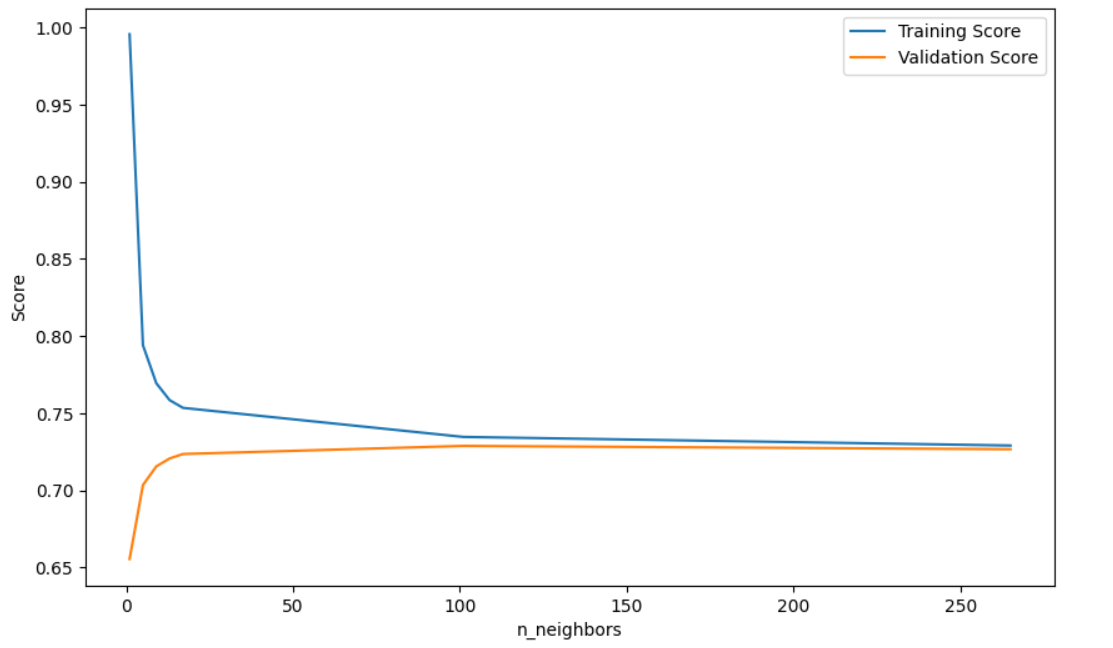

From the validation curve, an arbitrary number is selected that balances the training and testing accuracy of the model. By visualizing the plot, the elbow method can be used to see that an optimum K-value for the model would be 13. In the selection of this K-value, we ensure that the model does not regress from overfitting and underfitting.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model = KNeighborsClassifier(n_neighbors=13)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
KNN_predictions = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, KNN_predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


The configuration process for a K-Nearest Neighbors (KNN) model is straightforward, as illustrated earlier, with the sole hyperparameter requiring attention being the 'n_neighbors' value. As highlighted in the aforementioned article, choosing this hyperparameter involves a delicate balance, as lower values may result in overfitting, while higher values may lead to underfitting. To strike a suitable equilibrium, we opted for a value positioned between these extremes, ensuring a pragmatic compromise that aligns with the model's optimal performance without succumbing to issues of overfitting or underfitting.

The following code displays the confusion matrix for our KNN model. A confusion matrix is a way of comparing the difference between predicted and actual data. It consists of a table of 4 values:


1.   True Positive (TP): This value sits on the top left and shows how many times the model correctly predicted a positive (diabetic) outcome.
2.   True Negative (TN): This value sits on the bottom left and shows how many times the model correctly predicted a negative (non-diabetic) outcome.
3.   False Positive (FP): This value sits on the top right and shows how many times the model incorrectly predicted a positive (diabetic) outcome.
4.   False Negative (FN): This value sits on the bottom right and shows how many times the model incorrectly predicted a negative (non-diabetic) outcome.



In [ ]:
conf_matrix = confusion_matrix(y_test, KNN_predictions)

print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[4842 2269]
 [1628 5400]]


# Logistic Regression

The choice to implement a Logistic Regression model was rooted in its seamless alignment with the chosen dataset's characteristics. Logistic regression proves particularly adept at handling extensive datasets, generating outputs within a discernible range from 0 to 1. This range serves as a nuanced indicator of the model's confidence in predicting whether an individual has diabetes or not. Another reason why the group chose logistic regression is that, once the group establishes a robust model, the intention is to analyze the impact of each feature on predicting the presence of diabetes. This will allow for valuable comparisons with insights from healthcare professionals.

When using logistic regression, a random state is implemented to dictate how the train and test data are shuffled. For all executions given a random state value, the training and test data sets remain the same, however, this would change when the random state value is changed. For this project, a random state value of 42 was implemented as it is a popular number among computer scientists (Pramoditha, 2022).


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
LR_predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, LR_predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


Once again, this code displays the confusion matrix for the logistic regression model.

In [ ]:
# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, LR_predictions)

print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5098 2013]
 [1494 5534]]


The following code displays the associated weight values of each feature of the data set.

In [ ]:
for index, element in enumerate(model.coef_[0]):
  print(df.columns.values[index+1],":", element, end=' ')

HighBP : 0.7296831122727588 HighChol : 0.6011349215803421 CholCheck : 1.3693521526403867 BMI : 6.299372762149955 Smoker : 0.002195931898262535 Stroke : 0.173208816083403 HeartDiseaseorAttack : 0.24835568118216497 PhysActivity : -0.03895790990099306 Fruits : -0.031513629165434 Veggies : -0.062442775770980806 HvyAlcoholConsump : -0.7423944629715267 AnyHealthcare : 0.057629029356661615 NoDocbcCost : -0.008285326973460497 GenHlth : 2.327720231457796 MentHlth : -0.13877558209285046 PhysHlth : -0.23309622041913994 DiffWalk : 0.08554976868165834 Sex : 0.2750090844499477 Age : 1.8184339700144567 Education : -0.20120438831468834 Income : -0.42483645050881585 

This model suggests that BMI plays the biggest role in determining whether a person has diabetes or not. The model also shows that age and general health are the 2nd and 3rd most relevant factors, which can be supported by a study by Medhi et al. that observed that among senior citizens in Northeastern India, those with higher BMI are more likely to have diabetes, thus showing that the three biggest factors according to the model are factually accurate and backed by science (Medhi et al., 2021).

# Deep learning (not really)

Deep learning is a subfield of machine learning that involves training artificial neural networks with multiple layers (also called multi-layer perceptron) to learn and extract hierarchical representations of data. The purpose of these extra layers is to model the complexity of many real-world problems that a single-layer perceptron cannot (Walter, 2022). Through a process known as backpropagation, the network adjusts its parameters iteratively, minimizing the difference between predicted and actual outcomes during training. This adaptability enables deep learning models to generalize well to new, unseen data, making them powerful tools for tasks like image and speech recognition, autonomous vehicles, and natural language understanding.

Although two models are already sufficient for this project, the researchers wanted to compare the results of logistic regression and a simple four-layer neural network. The group wanted to compare the two models because they anticipated that the neural network might capture more intricate patterns and relationships within the data, potentially outperforming logistic regression in certain aspects.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=21, input_shape=(21,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

Compared to the models discussed earlier, neural network models involve tuning several hyperparameters. The rationale behind the choices made for the current neural network model is outlined below:

1. **Sequential Model Selection**: We opted for a linear stacking of layers because of its simplicity and widespread usage in various applications.
2. **Input Shape and Units Selection**: The choice of input_shape (21,) and the number of units in the first layer is grounded in the characteristics of our feature data. With 21 columns in our input data, we pass 21 values to the input layer to appropriately capture the data's structure.
3.**Activation Function** - Rectified Linear Unit (ReLU): We selected the Rectified Linear Unit (ReLU) as our activation function for both input and hidden layers. This choice aligns with common practice due to ReLU's efficiency in introducing non-linearity, essential for learning complex patterns in the data.
4. **Output Layer Configuration**: The output layer comprises a single neuron with a sigmoid activation function. This design is intentional; it reflects our objective of obtaining an output in the range of 0 to 1. The sigmoid activation is suitable for binary classification problems, providing a probability-like output. In our context, this value signifies the model's confidence in predicting whether an individual has diabetes or not.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=50, validation_split=0.1)

Epoch 1/10
1018/1018 [==============================] - 5s 4ms/step - loss: 0.5397 - accuracy: 0.7304 - val_loss: 0.5224 - val_accuracy: 0.7433
Epoch 2/10
1018/1018 [==============================] - 4s 4ms/step - loss: 0.5156 - accuracy: 0.7443 - val_loss: 0.5178 - val_accuracy: 0.7436
Epoch 3/10
1018/1018 [==============================] - 7s 7ms/step - loss: 0.5104 - accuracy: 0.7471 - val_loss: 0.5127 - val_accuracy: 0.7468
Epoch 4/10
1018/1018 [==============================] - 4s 4ms/step - loss: 0.5081 - accuracy: 0.7487 - val_loss: 0.5169 - val_accuracy: 0.7505
Epoch 5/10
1018/1018 [==============================] - 5s 5ms/step - loss: 0.5065 - accuracy: 0.7509 - val_loss: 0.5106 - val_accuracy: 0.7481
Epoch 6/10
1018/1018 [==============================] - 5s 5ms/step - loss: 0.5049 - accuracy: 0.7502 - val_loss: 0.5106 - val_accuracy: 0.7498
Epoch 7/10
1018/1018 [==============================] - 4s 4ms/step - loss: 0.5037 - accuracy: 0.7508 - val_loss: 0.5148 - val_accuracy:

In configuring the model for compilation, we chose the widely-used Adam optimizer due to its adaptive learning rate properties (and because we dont know how the other optimizers work lol). Then the binary_crossentropy loss function was selected to effectively measure dissimilarity in our binary classification task, enhancing the model's discrimination capabilities. For performance monitoring, accuracy was designated as the evaluation metric, providing insight into the proportion of accurately classified instances during training.

We then trained the model with 10 epochs and a batch size of 50. The validation_split parameter was set to 0.1, allocating 10% of the training data for validation purposes. Each epoch represents one complete iteration through the entire training dataset, and the batch size of 50 signifies that the model's weights are updated after processing each batch. The inclusion of validation data enables the assessment of the model's generalization performance, helping to detect potential overfitting. Through this training configuration, we aimed to strike a balance between the number of training iterations and the computational efficiency, while ensuring the model's robustness and effectiveness in making predictions on unseen data.


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

442/442 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.7523
Test accuracy: 0.7523162961006165


In [ ]:
# Generate classification report which will be used in the results and discussion
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Threshold probabilities for binary classification


442/442 [==============================] - 1s 2ms/step


# Results and Discussion

In [ ]:
# Generate classification reports for the different models
NN_report = classification_report(y_test, y_pred)
KNN_class_report = classification_report(y_test, KNN_predictions)
LR_class_report = classification_report(y_test, LR_predictions)

print("KNN Classification Report: \n\n",KNN_class_report,"\nLogistic Regression Classification Report: \n\n",LR_class_report, "\nNeural Network Classification Report: \n\n", NN_report)


KNN Classification Report: 

               precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      7111
         1.0       0.70      0.77      0.73      7028

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139
 
Logistic Regression Classification Report: 

               precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      7111
         1.0       0.73      0.79      0.76      7028

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139
 
Neural Network Classification Report: 

               precision    recall  f1-score   support

         0.0       0.79      0.69      0.74      7111
         1.0       0.72      0.82      0.77      7028

    accuracy                           0.75     14139
   macro 

Using accuracy as the sole criteria for evalution may be misleading because it masks the issue of class imbalance. An example of this is with our third dataset where a model can just predict no diabetes all the time and it will yield a 95% accuracy because 95% of our training dataset is no diabetes. Thats why we have to use other metrics to evaluate the performance of our model.

In order to come up with the most appropriate model for the given data set, two factors must be considered, the recall scores of the model and its consistency. With this in mind, Deep Learning was able to post the highest recall score, followed by Logistic Regression, and K-Nearest Neighbors. However, it was observed through multiple iterations that the values of Deep Learning were inconsistent and changed erratically. With this in mind we deemed Logistic regression as the most appropriate model as not only does it have a better recall score than KNN, it is able to extract the significant factors that contribute to the likelihood an individual has diabetes.

We must consider that in real world scenarios, falsely determining whether someone has diabetes or not could greatly impact their lives. It is best to use a model that is both factually accurate and consistent as the implications of these results could theoretically result to life and death situations. Working with the three models allowed us to gain valuable insights and deepen our understanding of machine learning. We understand that how we utilized these models is just the tip of the iceberg, but it was able to break the ice and show us a clear path to moving forward as researchers.


# References

Huilgol, P. (2020, September 3). Precision vs Recall | Precision and Recall Machine Learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/



Mayo Clinic. (2023, September 15). Diabetes - symptoms and causes. Mayo Clinic; Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444


Medhi, G. K., Dutta, G., Borah, P., Lyngdoh, M., & Sarma, A. (2021). Prevalence of Diabetes and Its Relationship With Body Mass Index Among Elderly People in a Rural Area of Northeastern State of India. Cureus. https://doi.org/10.7759/cureus.12747

Pramoditha, R. (2022, May 2). Why do we set a random state in machine learning models? Medium. https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431
Rmadhu. (2023, July 24). SVM and KNN algorithms : Medium. https://medium.com/@rmadhu2131/svm-and-knn-algorithms-c2bc72c854a5

RN, S. F. (2020, November 30). Why Early Detection is Key in Diabetes - My Virtual Physician. My Virtual Physician. https://myvirtualphysician.com/2020/11/30/why-early-detection-is-key-in-diabetes/
Varghese, D. (2019, May 10). Comparative study on Classic Machine learning Algorithms. Medium. https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222

Walter, T. (2022, March 30). Deep Learning: Adding Layers to the Network. CAMELOT Blog. https://blog.camelot-group.com/2022/03/deep-learning-adding-layers-to-the-network/


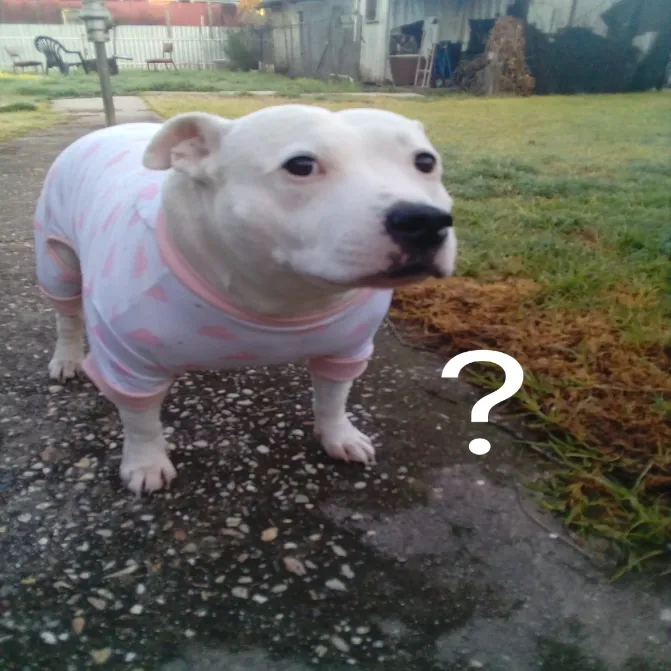